In [2]:
import nibabel as nib
from nilearn import image
from nilearn import plotting
from nilearn import datasets
from nilearn import maskers
from nilearn.connectome import ConnectivityMeasure
from tqdm import tqdm
import numpy as np
import os
import re
import pickle
from nilearn.input_data import NiftiLabelsMasker

In [40]:
dashMatch = re.compile(r'--')

In [ ]:
# getting all the paths
# for loop over all the subjects
file_paths = []
subject_paths = [r'./MCI (2years)/', r'./MCI (1year)/', r'./MCI (3years)/']
for subject_path in tqdm(subject_paths, disable=True):
    for one_file in tqdm(os.listdir(subject_path), colour='green'):
        if dashMatch.search(one_file):
            continue
        n_dir = os.path.join(subject_path, one_file)
        if not os.path.isdir(n_dir):
            continue
        nn_dir = os.path.join(n_dir, 'func')
        for two_file in os.listdir(nn_dir):
            if not two_file.startswith('swar'):
                continue
            fmri_path = os.path.join(nn_dir, two_file)
            file_paths.append(fmri_path)
sorted_fmri_paths = sorted(file_paths)

100%|██████████| 13/13 [00:00<00:00, 34.29it/s]


In [51]:
# getting all the paths
# for loop over all the subjects
cn_fmri_file_paths = []
subject_paths = [r'D:\adni datasets\CN (2years)']
for subject_path in tqdm(subject_paths, disable=True):
    for one_file in tqdm(os.listdir(subject_path), colour='green'):
        if dashMatch.search(one_file):
            continue
        n_dir = os.path.join(subject_path, one_file)
        if not os.path.isdir(n_dir):
            continue
        nn_dir = os.path.join(n_dir, 'func')
        for two_file in os.listdir(nn_dir):
            if not two_file.startswith('swar'):
                continue
            fmri_path = os.path.join(nn_dir, two_file)
            cn_fmri_file_paths.append(fmri_path)
sorted_cn_fmri_paths = sorted(cn_fmri_file_paths)

100%|██████████| 38/38 [00:00<00:00, 3806.63it/s]


In [5]:
# regex for starts with 'wm' then `numbers` at end '.nii'
wm_match = re.compile(r'^wm.*\.nii$')

In [ ]:
# all smri paths
smri_paths = []
smri_path = r'D:\adni datasets\MCI_structural_all'
for year_dir in os.listdir(smri_path):
    year_path = os.path.join(smri_path, year_dir)
    if not os.path.isdir(year_path):
        continue
    for subject in os.listdir(year_path):
        subject_path = os.path.join(year_path, subject)
        images_path = os.path.join(subject_path, 'mri')
        for image_file in os.listdir(images_path):
            if not wm_match.search(image_file):
                continue
            image_path = os.path.join(images_path, image_file)
            smri_paths.append(image_path)
sorted_smri_paths = sorted(smri_paths)
        

In [41]:
# all smri paths
cn_smri_paths = []
smri_path = r'D:\adni datasets\CN_structural_all (2years)\CN (2years)'
for subject in os.listdir(smri_path):
    subject_path = os.path.join(smri_path, subject)
    images_path = os.path.join(subject_path, 'mri')
    for image_file in os.listdir(images_path):
        if not wm_match.search(image_file):
            continue
        image_path = os.path.join(images_path, image_file)
        cn_smri_paths.append(image_path)
sorted_cn_smri_paths = sorted(cn_smri_paths)

In [55]:
# comparing the paths
for i, (fmri_path, smri_path) in enumerate(zip(sorted_cn_fmri_paths, sorted_cn_smri_paths)):
    # getting the end of the path
    fmri_path_end = fmri_path.split('\\')[-1]
    smri_path_end = smri_path.split('\\')[-1]
    if fmri_path_end[4:] != smri_path_end[2:]:
        print(f'{i}: {fmri_path_end} != {smri_path_end}')

In [8]:
len(sorted_fmri_paths), len(sorted_smri_paths)

(52, 52)

In [57]:
# loading the MCI structural images from smri_paths
cn_smri_images = []
for smri_path in tqdm(sorted_cn_smri_paths, colour='green', disable=False):
    smri_image = nib.load(smri_path)
    cn_smri_images.append(smri_image.get_fdata())

100%|██████████| 30/30 [00:03<00:00,  7.81it/s]


In [58]:
# checking for null values
for i, smri_image in enumerate(cn_smri_images):
    if smri_image is None:
        print(f'{i}: {smri_image}')

In [59]:
# pickle dump
cn_smri_images = np.array(cn_smri_images)
with open('feature_extraction\cat12_CN_structural_features.pkl', 'wb') as f:
    pickle.dump(cn_smri_images, f)

In [2]:
fmri_4d_path  = r'MCI (2years)\003_S_0908\func\swar003_S_0908.nii'  # fMRI file
fmri_img = nib.load(fmri_4d_path)
img = image.load_img(fmri_img)
img.shape

(47, 56, 47, 197)

In [3]:
# Fetch the AAL atlas
aal_atlas = datasets.fetch_atlas_aal()

# Get the number of regions (ROIs) from AAL atlas
n_regions = len(aal_atlas['labels'])

print(f'AAL atlas has {n_regions} ROIs.')

# Print the first few region names
print(f"Regions in AAL atlas: {aal_atlas['labels'][:]}, {len(aal_atlas['labels'][:])}")

AAL atlas has 116 ROIs.
Regions in AAL atlas: ['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occ

## For all the files :)

In [61]:
aal_atlas = datasets.fetch_atlas_aal()

In [62]:
masker = maskers.NiftiLabelsMasker(
    labels_img=aal_atlas.maps,  # Use maps_img instead of maps
    resampling_target="data",
    t_r=3, 
    detrend=True,
    low_pass=0.1, 
    high_pass=0.01
)

In [63]:
correlation_measure = ConnectivityMeasure(kind='correlation')

In [64]:
# for loop over all the subjects
final_features = []
for fmri_path in tqdm(sorted_cn_fmri_paths):
    fmri_img = nib.load(fmri_path)
    img = image.load_img(fmri_img)
    features = masker.fit_transform(fmri_img)
    correlation_matrix = correlation_measure.fit_transform([features])[0]
    final_features.append(correlation_matrix.reshape(-1))

100%|██████████| 30/30 [05:57<00:00, 11.92s/it]


In [65]:
# checking for null values in the final_features
for i, feature in enumerate(final_features):
    if np.isnan(feature).any():
        print(f'{i}: {feature}')

In [66]:
final_features = np.array(final_features)
final_features.shape

(30, 13456)

In [67]:
pickle.dump(final_features, open(r'./feature_extraction/CN_func_features.pkl', 'wb'))

In [3]:
mci_data = pickle.load(open(r'feature_extraction\MCI_func_features.pkl', 'rb'))
ad_data = (pickle.load(open(r'feature_extraction\AD_func_features.pkl', 'rb')))
cn_data = pickle.load(open(r'./feature_extraction/CN_func_features.pkl', 'rb'))

In [8]:
func_data = np.concatenate((mci_data, ad_data, cn_data), axis=0)
func_data.shape

(122, 13456)

In [6]:
mci_data.shape, ad_data.shape

((52, 13456), (40, 13456))

In [9]:
y = np.zeros((mci_data.shape[0],))
y = np.append(y, np.ones((ad_data.shape[0],)))
y = np.append(y, np.full((cn_data.shape[0],), 2))
y.shape

(122,)

In [10]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

In [ ]:
# checking for nan values in mci_ad data
np.isnan(mci_ad).any() # True
# checking for nan values in cn_data
np.isnan(ad_data).any() # False
# checking for nan values in mci_data
np.isnan(mci_data).any() # True

True

In [36]:
# replacing nan with 0
mci_ad = np.nan_to_num(mci_ad)

In [12]:
# test data train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(func_data, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97, 13456), (25, 13456), (97,), (25,))

In [13]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernals = ['linear', 'poly', 'rbf', 'sigmoid']
for kernal in kernals:
    model = SVC(kernel=kernal)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("kernal ",kernal)
    print("test accuracy ",accuracy_score(y_test, y_pred))
    print("train accuracy ",accuracy_score(y_train, model.predict(X_train)))
    print("------")
# model = SVC()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("test accuracy ",accuracy_score(y_test, y_pred))
# print("train accuracy ",accuracy_score(y_train, model.predict(X_train)))

kernal  linear
test accuracy  0.56
train accuracy  1.0
------
kernal  poly
test accuracy  0.64
train accuracy  1.0
------
kernal  rbf
test accuracy  0.56
train accuracy  0.9484536082474226
------
kernal  sigmoid
test accuracy  0.48
train accuracy  0.41237113402061853
------


In [14]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost model
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the accuracy
print("XGBoost test accuracy:", accuracy_score(y_test, y_pred))
print("XGBoost train accuracy:", accuracy_score(y_train, model.predict(X_train)))

XGBoost test accuracy: 0.44
XGBoost train accuracy: 1.0


In [15]:
# feature extraction with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((97, 88), (25, 88))

In [16]:
# SVM with PCA
model2 = SVC()
model2.fit(X_train_pca, y_train)
y_pred_pca = model2.predict(X_test_pca)
print("test accuracy ", accuracy_score(y_test, y_pred_pca))
print("train accuracy ", accuracy_score(y_train, model2.predict(X_train_pca)))

test accuracy  0.48
train accuracy  0.979381443298969


In [17]:
# trying with LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_train_lda.shape, X_test_lda.shape

((97, 2), (25, 2))

In [ ]:
# SVM with LDA

model3 = SVC()
model3.fit(X_train_lda, y_train)
y_pred_lda = model3.predict(X_test_lda)
print("test accuracy ", accuracy_score(y_test, y_pred_lda))
print("train accuracy ", accuracy_score(y_train, model3.predict(X_train_lda)))

test accuracy  0.52
train accuracy  0.8247422680412371


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Create a pipeline with LDA and SVM
pipeline = Pipeline([
    ('lda', LinearDiscriminantAnalysis()),
    ('svm', SVC())
])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.7        0.5        0.47368421 0.52631579 0.57894737]
Mean cross-validation score: 0.5557894736842105


In [20]:
pipeline2 = Pipeline([
    ('pca', PCA(n_components=0.99)),
    ('svm', SVC())
])

# Perform cross-validation
scores = cross_val_score(pipeline2, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.75       0.35       0.52631579 0.57894737 0.57894737]
Mean cross-validation score: 0.5568421052631579


In [22]:
# standard scalar
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)

In [26]:
# SVM with standard scalar
model4 = SVC()
model4.fit(X_train_scaled, y_train)
X_test_scaled = mms.transform(X_test)
y_pred_scaled = model4.predict(X_test_scaled)
accuracy_score(y_test, y_pred_scaled)

NameError: name 'X_train_scaled' is not defined

In [21]:
# Create a pipeline with LDA and SVM
pipeline3 = Pipeline([
    ('lda', LinearDiscriminantAnalysis()),
    ('svm', SVC())
])

# Perform cross-validation
scores = cross_val_score(pipeline3, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

NameError: name 'X_train_scaled' is not defined

In [25]:
pipeline4 = Pipeline([
    ('pca', PCA(n_components=0.99)),
    ('svm', SVC())
])

# Perform cross-validation
scores = cross_val_score(pipeline4, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.6        0.66666667 0.53333333 0.53333333 0.71428571]
Mean cross-validation score: 0.6095238095238095


In [26]:
aal_atlas = datasets.fetch_atlas_aal()

In [27]:
aal_atlas = datasets.fetch_atlas_aal()
struct_masker = NiftiLabelsMasker(
    labels_img=aal_atlas.maps,  # ROI map from the AAL atlas
    standardize=True,           # Standardize data (mean=0, variance=1)
    smoothing_fwhm=4            # Apply spatial smoothing (optional, adjust as needed)
).fit()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
cm = np.array([[1942, 17, 8], [8, 1986, 16], [11, 17, 1943]])
labels = ['AD', 'CN', 'MCI']

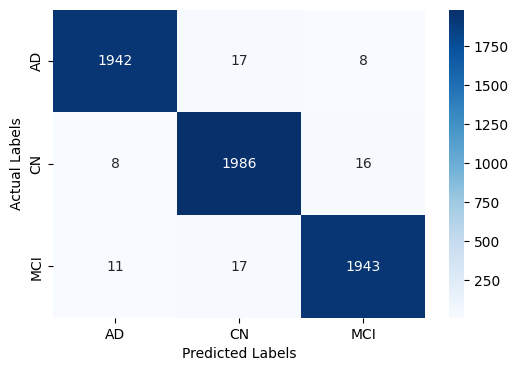

In [30]:
# Plotting
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.savefig("confusion_matrix.png", dpi=300)

In [22]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(X_train, y_train)
y_pred_rf = model5.predict(X_test)
print("test accuracy ", accuracy_score(y_test, y_pred_rf))
print("train accuracy ", accuracy_score(y_train, model5.predict(X_train)))

test accuracy  0.56
train accuracy  1.0


In [40]:
%pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [23]:
# finding the right hyperparameters for random forest
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Criterion", "n_estimators", "test accuracy", "train accuracy"]

criterions = ['gini', 'entropy', 'log_loss']
n_estimators = [10, 50, 100, 200, 500]
print("Random Forest Classifier\n----------")
for criterion in criterions:
    for n_estimator in n_estimators:
        model6 = RandomForestClassifier(criterion=criterion, n_estimators=n_estimator)
        model6.fit(X_train, y_train)
        y_pred_rf = model6.predict(X_test)
        # tabular fomate with criterion, n_estimators with pretty tables
        table.add_row([criterion, n_estimator, accuracy_score(y_test, y_pred_rf), accuracy_score(y_train, model6.predict(X_train))])
print(table) 

Random Forest Classifier
----------
+-----------+--------------+---------------+--------------------+
| Criterion | n_estimators | test accuracy |   train accuracy   |
+-----------+--------------+---------------+--------------------+
|    gini   |      10      |      0.56     | 0.9896907216494846 |
|    gini   |      50      |      0.56     |        1.0         |
|    gini   |     100      |      0.56     |        1.0         |
|    gini   |     200      |      0.6      |        1.0         |
|    gini   |     500      |      0.6      |        1.0         |
|  entropy  |      10      |      0.64     | 0.979381443298969  |
|  entropy  |      50      |      0.48     |        1.0         |
|  entropy  |     100      |      0.44     |        1.0         |
|  entropy  |     200      |      0.52     |        1.0         |
|  entropy  |     500      |      0.56     |        1.0         |
|  log_loss |      10      |      0.32     |        1.0         |
|  log_loss |      50      |      0.4   

In [24]:
# PCA + random forst
pipeline4 = Pipeline([
    ('pca', PCA(n_components=0.99)),
    ('rf', RandomForestClassifier())
])

# test and train accuracy
pipeline4.fit(X_train, y_train)
y_pred_rf_pca = pipeline4.predict(X_test)
print("test accuracy ", accuracy_score(y_test, y_pred_rf_pca))
print("train accuracy ", accuracy_score(y_train, pipeline4.predict(X_train)))

test accuracy  0.4
train accuracy  1.0


In [25]:
# LDA + random forst
pipeline5 = Pipeline([
    ('lda', LinearDiscriminantAnalysis()),
    ('rf', RandomForestClassifier())
])

# test and train accuracy
pipeline5.fit(X_train, y_train)
y_pred_rf_lda = pipeline5.predict(X_test)
print("test accuracy ", accuracy_score(y_test, y_pred_rf_lda))
print("train accuracy ", accuracy_score(y_train, pipeline5.predict(X_train)))

test accuracy  0.6
train accuracy  1.0
